<a href="https://colab.research.google.com/github/Shirouky/lab5-Data-analysis/blob/main/LW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Базовые функции

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def import_xlsx():
  FILE_NAME = "DataFrame beads.xlsx"
  df = pd.read_excel(FILE_NAME)
  return df

In [ ]:
def import_json():
  FILE_NAME = "beads (1).json"
  df = pd.read_json(FILE_NAME)
  return df

In [ ]:
def save_xlsx(df):
  df.to_excel("DataFrame.xlsx", index=False)

In [ ]:
df = import_json()

In [ ]:
df = import_xlsx()

# Задание

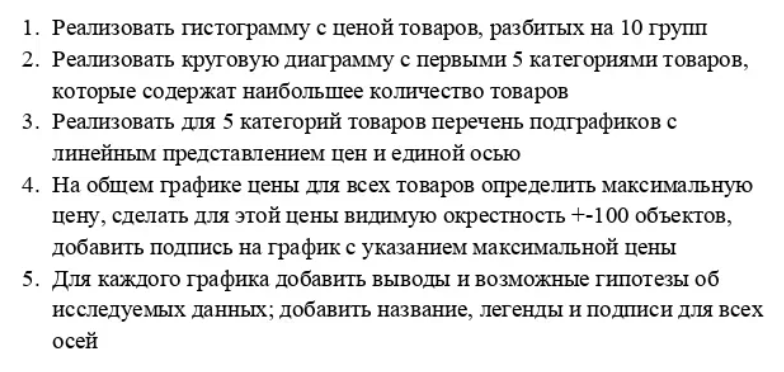

## Гистограмма цен на 10 групп

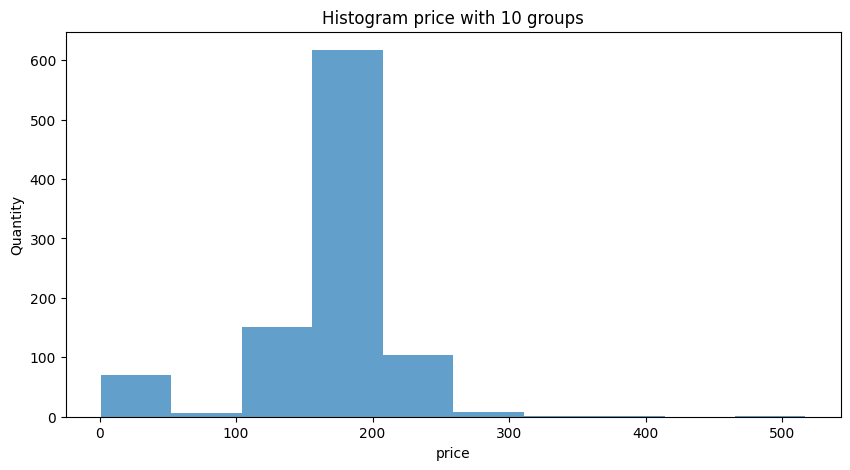

In [ ]:
def create_hist(df, column, bins=10):
  plt.figure(figsize=(10, 5))
  plt.hist(df[column], bins=bins, alpha=0.7)
  plt.title(f"{column} histogram with {bins} groups")
  plt.xlabel(column)
  plt.ylabel("Quantity")
  plt.show()

create_hist(df, "price")

Цены в основном сосредоточены вокруг 180-200 рублей

## Круговая диаграмма топ-5

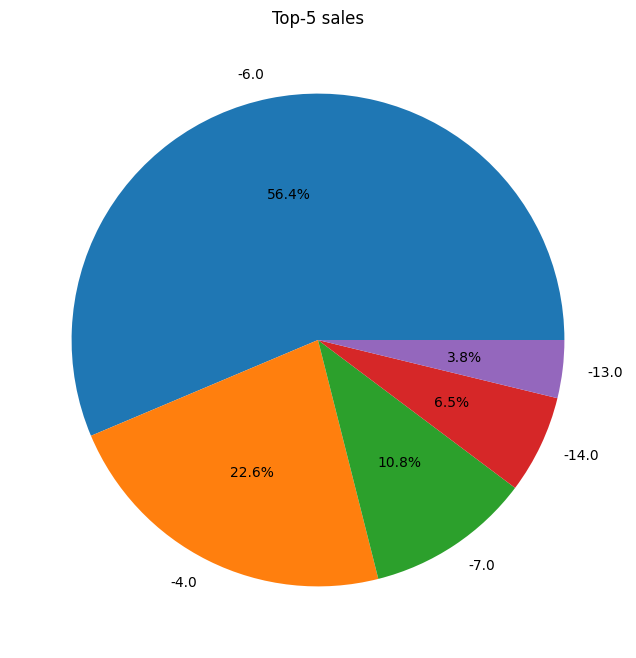

In [ ]:
def create_pie(df, column, top=5):
  plt.figure(figsize=(8, 8))
  top_categories = df[column].value_counts().head(top)
  plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
  plt.title(f"Top-5 {column}s")
  plt.show()

create_pie(df, "sale")

Скидка в основном небольшая (4 или 6 процентов)

## Линейные графики цен для 5 категорий

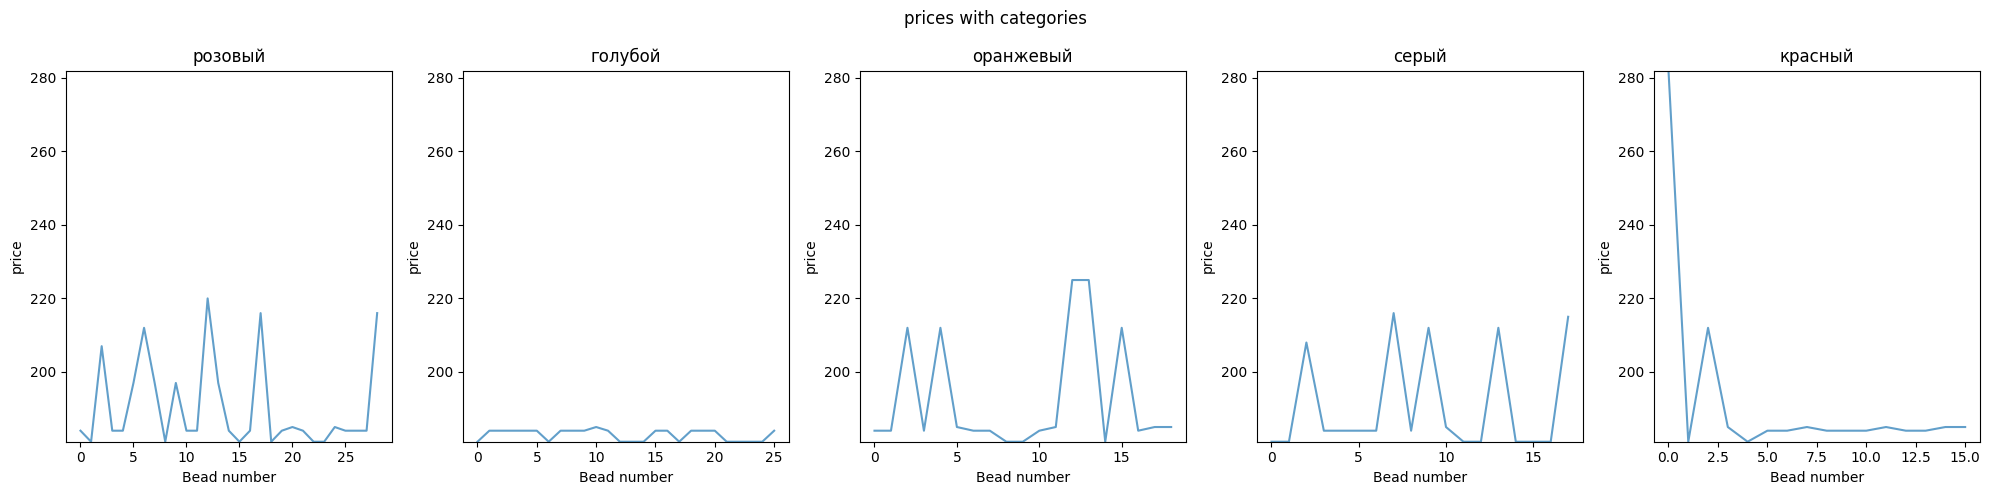

In [ ]:
def create_linear(df, column_x, column_y, top=5):
  fig, axes = plt.subplots(1, 5, figsize=(20, 5))
  fig.suptitle(f"{column_y}s with categories")
  axes = axes.flatten()
  top_categories = df[column_x].value_counts().head(top)

  selected_data = df[df[column_x].isin(top_categories.index)][column_y]
  y_min = selected_data.min()
  y_max = selected_data.max()

  for i, category in enumerate(top_categories.index[:top]):
      category_data = df[df[column_x] == category][column_y].values
      axes[i].plot(category_data, alpha=0.7)
      axes[i].set_title(category)
      axes[i].set_ylabel(column_y)
      axes[i].set_xlabel("Bead number")
      axes[i].set_ylim(y_min, y_max)

  plt.tight_layout()
  plt.show()

create_linear(df, "color", "price")

Голубой цвет, в отличие от остальных, продается стабильно по низкой цене. У красного цвета есть выброс. У розового, оранжевого и серого прослеживается устойчивая цена около 200 рублей

## Максимальная цена с окрестностью

In [ ]:
def create_span(df, column, area=100):
  plt.figure(figsize=(12, 6))
  plt.plot(df[column].values, alpha=0.7)
  max_idx = df[column].idxmax()
  max_ = df[column].max()

  start_idx = max(0, max_idx - area)
  end_idx = min(len(df), max_idx + area)

  plt.axvspan(start_idx, end_idx, alpha=0.3, color='red', label=f"Max {column} area")
  plt.annotate(f"Max: {max_}",
              xy=(max_idx, max_),
              xytext=(max_idx + 50, max_ - 50),
              arrowprops=dict(arrowstyle='->'))

  plt.title(f"{column} with area around maximum")
  plt.xlabel("Goods index")
  plt.ylabel(column)
  plt.legend()
  plt.show()

create_span(df, "price")

Максимальная цена - выброс, в окрестности цены значительно ниже